In [1]:
# OCUMET script
# is there any other reason for other than because they're bilateral?

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

# these modules can be found at: https://github.com/miaomiaoyu/toolbox
from prepper import Prepper as pp
from summarizer import Summarizer
from shoebox import *
from visualizer import *
from wrangler import *


# -- tidy data
data = pp.get_data('ocumet-1102-clean-01.csv', lowercase=True)

# -- color palettes
rb = Colors().rb_light

"""
Nov 17 2022
Data exploration for dataset 'ocumet-1102-raw.csv'
Question
- Do NAION unilateral and bilateral have differences in overall FPF?
- FPF is higher for ODD than controls
- FPF is higher for NAION bilateral than unilateral. 
"""

dic = {
    'control':'Control',
    'naion':'NAION',
    'naion_uni':'NAION Unilateral',
    'naion_bi':'NAION Bilateral',
    'odd':'ODD',
    'odd_uni': 'ODD Unilateral', 
    'odd_bi': 'ODD Bilateral'}


colors init


In [2]:
os.path.exists('../data/ocumet-1102-fpf.csv')


False

In [19]:
def data_subset(data, dvars, ivars):
    ''' subset maker '''
    subset = data[ ivars + dvars ].copy()
    return subset

ivars = ['id', 'visit_no', 'diagnosistmp']
dvar_types = ['fpf', 'oct']

for dvar_type in dvar_types:
    dvars = [col for col in data.columns if col.startswith(dvar_type)]  # FPF
    dvars.append('hvf_mean_deviation')
    subset = data_subset(data, dvars, ivars)
    dvars.remove('hvf_mean_deviation')
    dvars_tmp = [dvar.split("_")[1] + "_" + dvar.split("_")[-1] for dvar in dvars]  # remove the dvar_type
    subset.rename(columns=dict(zip(dvars, dvars_tmp)), inplace=True)
    dvars = rank_list(lst=dvars_tmp, order=['rnfl', 'gh', 'gcc', 'cq'])
    subset = set_nans(data=subset, dvars=dvars_tmp, ivars='diagnosistmp')
    display(subset.head())


,id,visit_no,diagnosistmp,rnfl_t,rnfl_s,rnfl_n,rnfl_i,gcc_st,gcc_s,gcc_sn,...,gh_in,gh_it,gh_t,gh_s,gh_i,cq_st,cq_sn,cq_in,cq_it,hvf_mean_deviation
0,9.OD,5.0,NAION Bilateral,33.65,32.27,36.77,37.96000,18.0109,15.2034,16.0061,...,36.5291,37.135000,37.967000,34.6299,36.8677,18.13,16.61,23.06,22.34,NaN
1,9.OS,5.0,NAION Bilateral,4.18,7.65,5.93,5.07000,7.9281,9.5644,9.0458,...,6.2012,5.556700,5.085500,4.1833,5.8447,8.17,9.31,11.20,8.66,NaN
3,102.OD,1.0,NAION Bilateral,17.83,20.98,22.61,27.29949,14.5428,17.4634,13.9336,...,21.7918,27.681249,28.733091,15.4743,21.7918,15.32,14.59,17.43,17.17,NaN
4,137.OD,1.0,NAION Bilateral,3.38,4.71,5.03,6.14000,16.8078,13.1805,13.8767,...,5.4119,4.806800,6.434800,3.4423,5.0742,17.00,14.43,20.02,20.75,NaN
5,137.OS,1.0,NAION Bilateral,2.42,4.39,5.46,4.55000,1.6991,1.7270,1.7989,...,5.1485,5.767900,4.601300,2.4708,5.4886,1.71,1.78,2.20,1.75,NaN


,id,visit_no,diagnosistmp,rnfl_t,rnfl_s,rnfl_n,rnfl_i,gcc_st,gcc_s,gcc_sn,...,gh_in,gh_it,gh_t,gh_s,gh_i,cq_st,cq_sn,cq_in,cq_it,hvf_mean_deviation
0,9.OD,5.0,NAION Bilateral,33.65,32.27,36.77,37.96000,18.0109,15.2034,16.0061,...,36.5291,37.135000,37.967000,34.6299,36.8677,18.13,16.61,23.06,22.34,NaN
1,9.OS,5.0,NAION Bilateral,4.18,7.65,5.93,5.07000,7.9281,9.5644,9.0458,...,6.2012,5.556700,5.085500,4.1833,5.8447,8.17,9.31,11.20,8.66,NaN
3,102.OD,1.0,NAION Bilateral,17.83,20.98,22.61,27.29949,14.5428,17.4634,13.9336,...,21.7918,27.681249,28.733091,15.4743,21.7918,15.32,14.59,17.43,17.17,NaN
4,137.OD,1.0,NAION Bilateral,3.38,4.71,5.03,6.14000,16.8078,13.1805,13.8767,...,5.4119,4.806800,6.434800,3.4423,5.0742,17.00,14.43,20.02,20.75,NaN
5,137.OS,1.0,NAION Bilateral,2.42,4.39,5.46,4.55000,1.6991,1.7270,1.7989,...,5.1485,5.767900,4.601300,2.4708,5.4886,1.71,1.78,2.20,1.75,NaN


In [5]:
x = 'hello'
def is_data(x, t=('hello','bye')):
    return (x in t
is_data(x)




True

<Figure size 640x480 with 0 Axes>

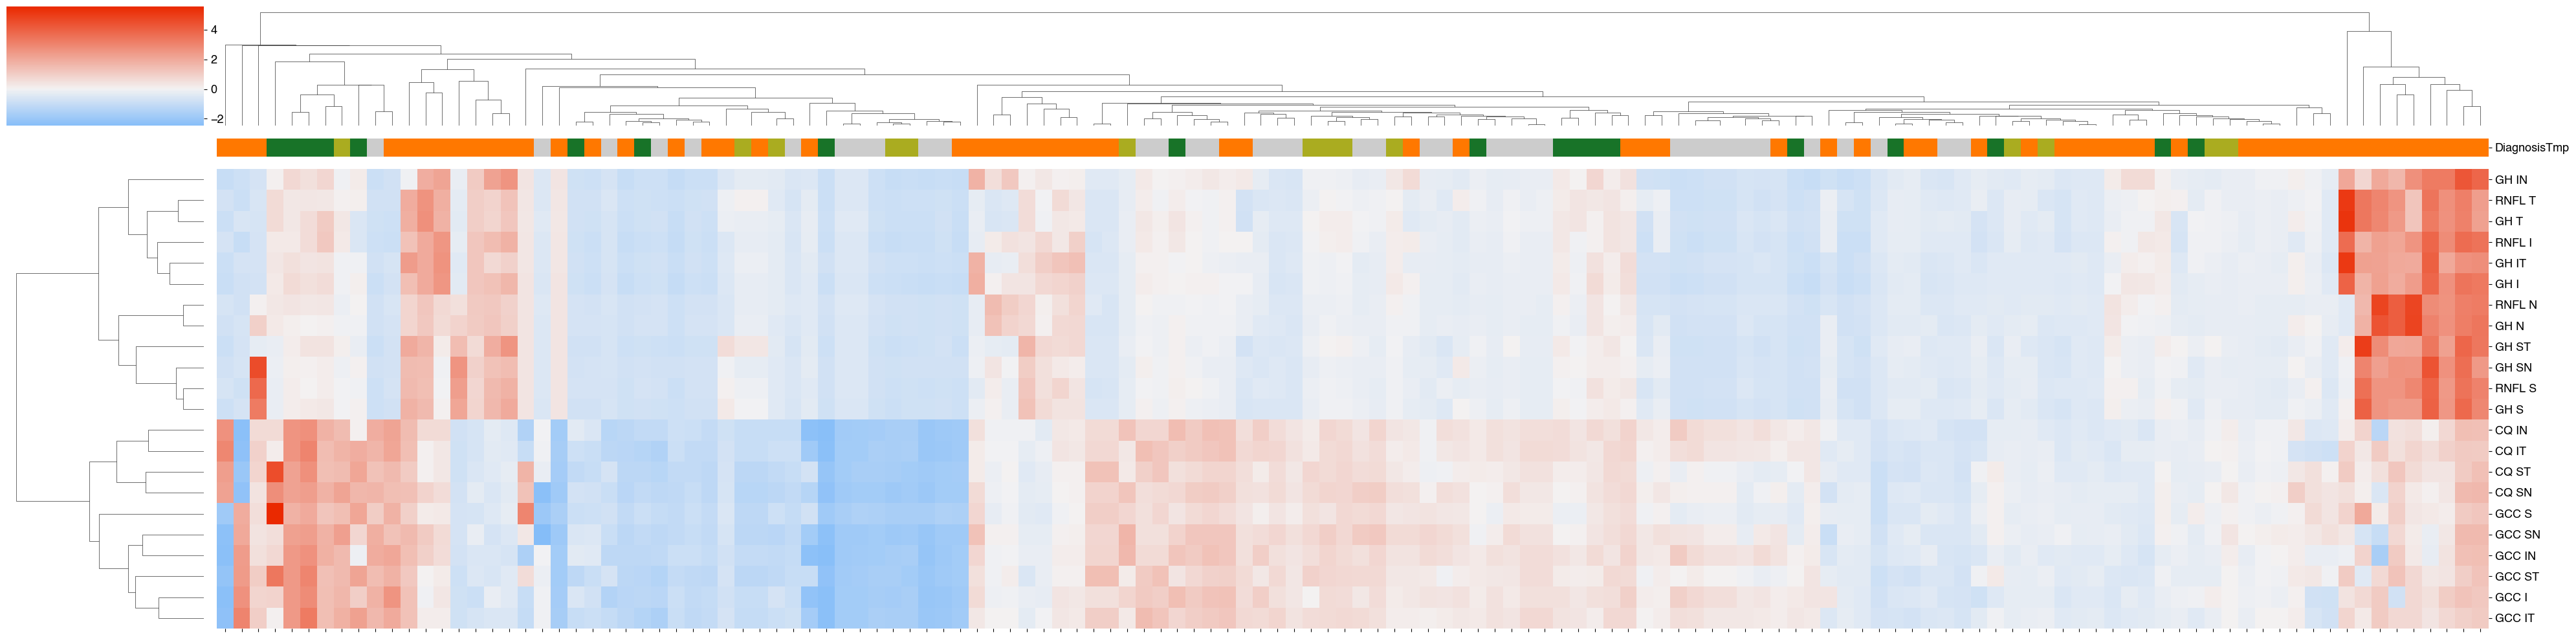

In [3]:
diagnosis_colors = data.diagnosistmp.map(color_lut)

scaled_data = data.copy()
ctrl_data = data[data['diagnosistmp']=='Control']
scaled_data[dvars] = standardized_to_controls(data[dvars], ctrl_data[dvars])

fig = plt.figure()
g = sns.clustermap(data[dvars].T, z_score=0, cmap=cpal.diverge(), center=0, figsize=(40,10), dendrogram_ratio=(.08,.2), col_colors=diagnosis_colors)

yticklabels = g.ax_heatmap.axes.get_yticklabels()
yticklabels = [labels.get_text().replace("_", " ") for labels in yticklabels]
g.ax_heatmap.axes.set_yticklabels(yticklabels)
g.tick_params(axis='x', labelbottom=False)
plt.tight_layout()
plt.show()
fpf = data.copy()

In [8]:
# First pass cleaning - use notebook, go crazy, don't care.
# Save out the clean data.
# Then analysis broken down by sections. 

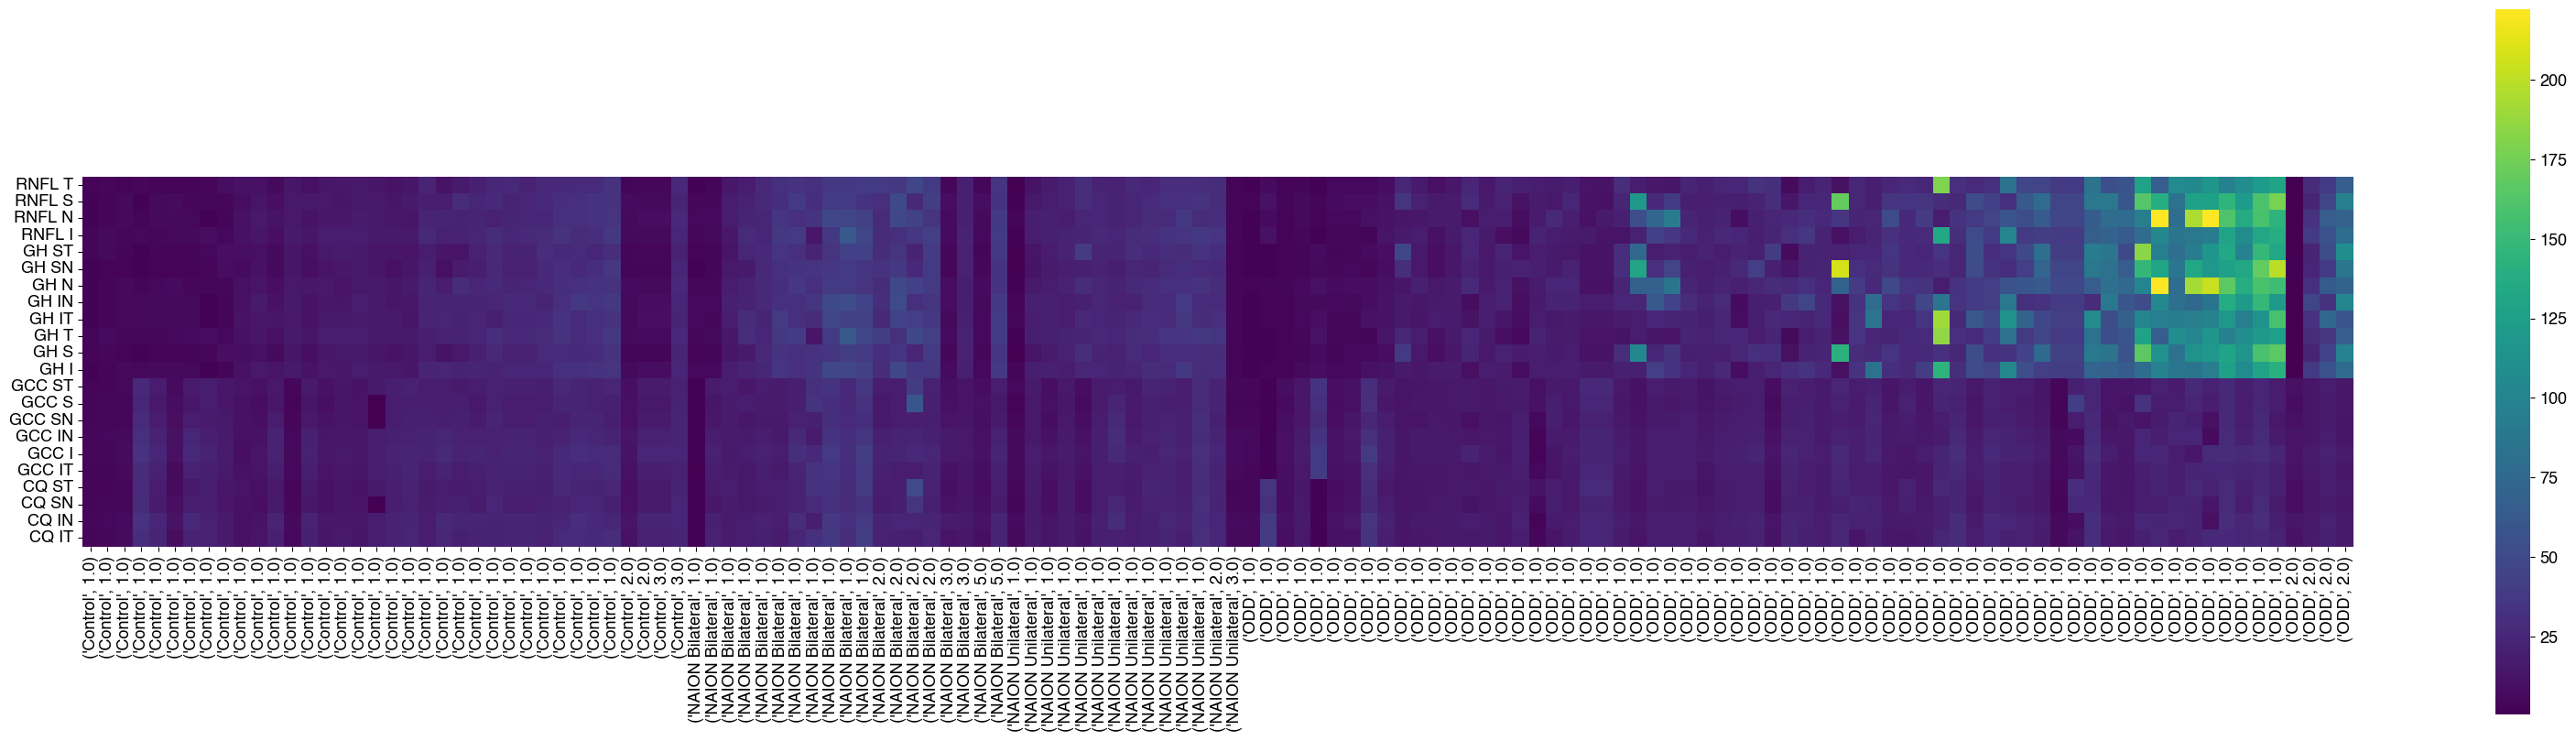

In [10]:
fpf['Ranking FPF'] = fpf[dvars].median(axis=1)  # since this is not a clustermap, this helps arrange it by intensity

fpf_visno = fpf.groupby(['DiagnosisTmp', 'Visit_no', 'Ranking FPF'])[dvars].mean().reset_index() # data.copy() 
fpf_visno = fpf_visno.sort_values(by=['DiagnosisTmp', 'Visit_no', 'Ranking FPF'])
fpf_visno.index = fpf_visno[['DiagnosisTmp', 'Visit_no']]

fig = plt.figure(figsize=(40,10))
g = sns.heatmap(fpf_visno[dvars].T, cmap='viridis', square=True)
yticklabels = g.get_yticklabels()
yticklabels = [labels.get_text().replace("_", " ") for labels in yticklabels]
g.set_yticklabels(yticklabels)
fig.savefig(
    "../output/heatmap_Ctrl_NAION_ODD.svg", dpi='figure', format='svg')

plt.show()

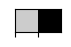

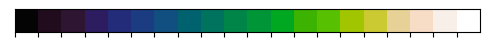

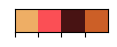

In [15]:
def set_lutpalette(lutpalette):
    luts = {
        'blackgray':['#cccccc','#000000'],
        'cartalinear':palettable.mycarta.LinearL_20.hex_colors,
        'wesgrand':palettable.wesanderson.GrandBudapest1_4.hex_colors
        }
    
    for name, palette in luts.items():
        sns.palplot(palette, size=.3)

set_lutpalette('lut1')

In [11]:
ivars = ['ID', 'Visit_no', 'DiagnosisT', 'Age']
dvars = [col for col in df.columns if col.startswith('OCT_')]
data = df[ ivars + dvars ].copy()

data = fill_nans_with_means(data, columns=dvars, group='Diagnosis')
data = data[data['Diagnosis'].isin(['ODD', 'NAION', 'Control'])]

dvars_clean = [dvar.split("_")[1] + "_" + dvar.split("_")[-1] for dvar in dvars]
data.rename(columns=dict(zip(dvars, dvars_clean)), inplace=True)
data['Type'] = 'OCT'

octd = data.copy()

KeyError: "['DiagnosisT'] not in index"

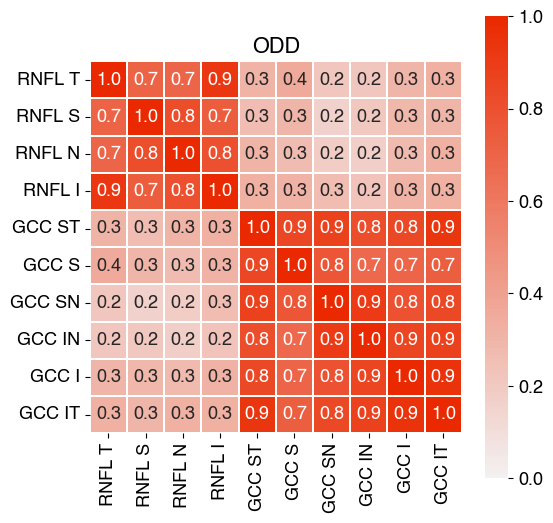

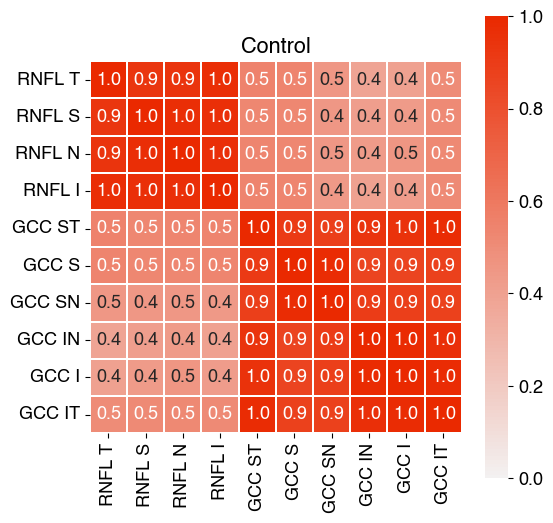

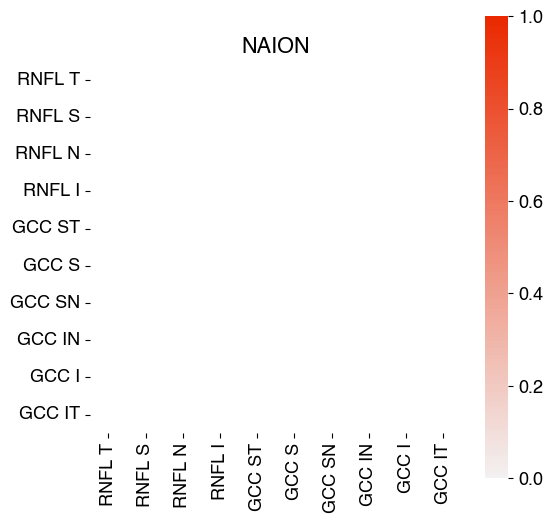

In [ ]:
fpfoct = pd.concat([fpf, octd])

dvars = [col for col in fpfoct if (col.startswith('RNFL_')) or (col.startswith('GCC_'))]
ivars = ['ID', 'DiagnosisTmp' ]

fpfoct = fpfoct[ ivars + dvars + ['Type']].copy()

for diagnosis in ['ODD', 'Control', 'NAION']:
    
    fpfoct_corr = fpfoct[fpfoct['DiagnosisTmp']==diagnosis].corr(numeric_only=True)

    fig = plt.figure(figsize=(6,6))

    g = sns.heatmap(fpfoct_corr, cmap=cpal.diverge(), linewidths=.1, center=0, vmin=0, vmax=1, square=True, annot=True, fmt=".1f")
    xticklabels = g.get_xticklabels()
    xticklabels = [labels.get_text().replace("_", " ") for labels in xticklabels]
    g.set_xticklabels(xticklabels)
    g.set_yticklabels(xticklabels)
    g.set_title(diagnosis)

    plt.show()

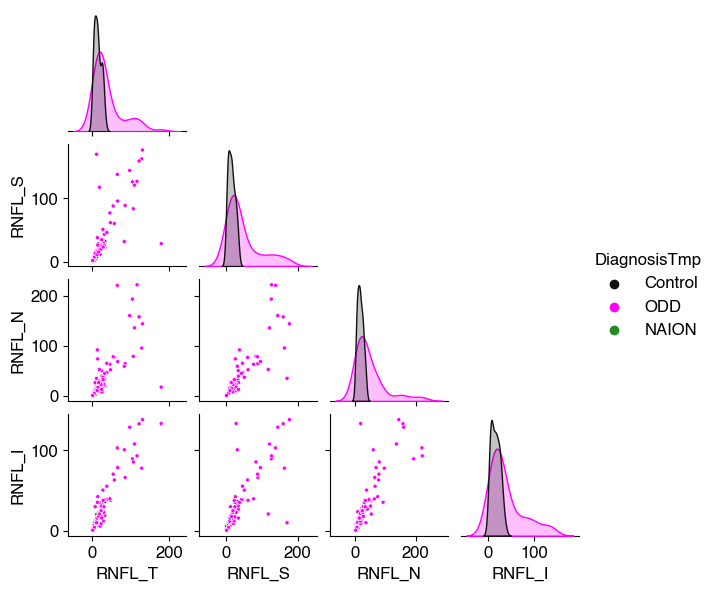

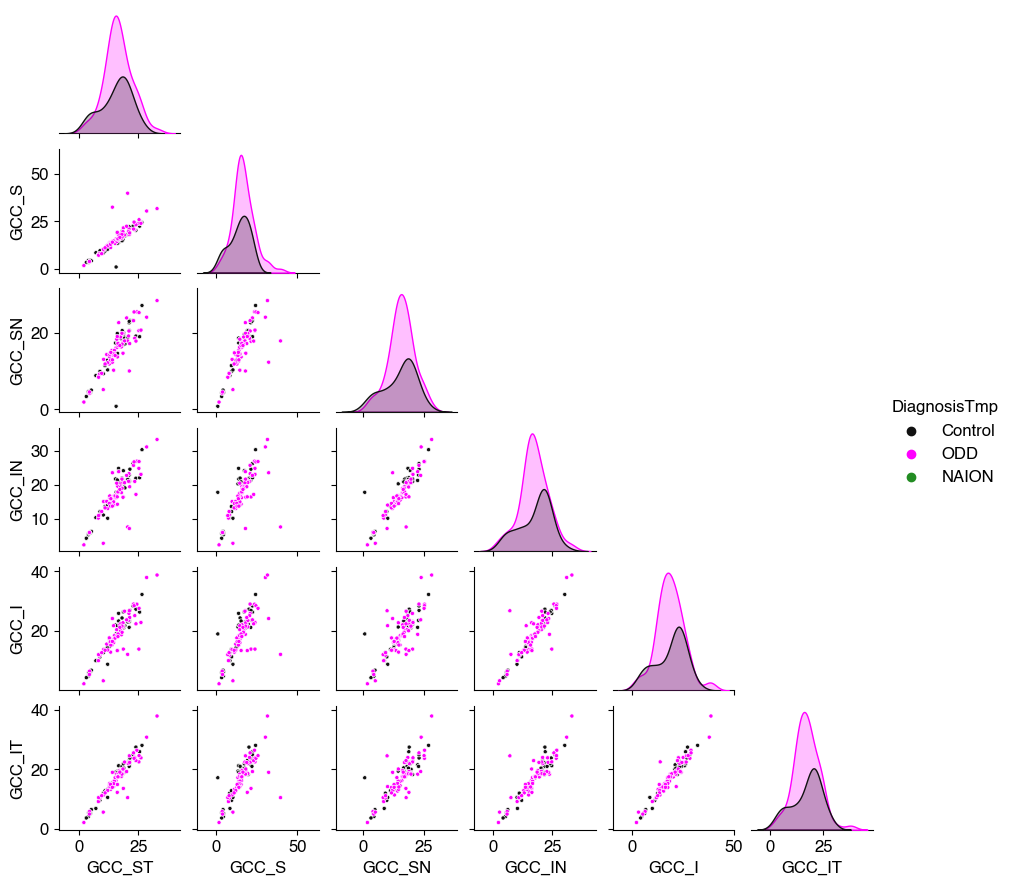

In [ ]:
fpfoct_gcc = fpfoct[fpfoct.columns.drop(list(fpfoct.filter(regex='RNFL')))]
fpfoct_rnfl = fpfoct[fpfoct.columns.drop(list(fpfoct.filter(regex='GCC')))]

fontset(fontsize=12)

g = sns.pairplot(
    fpfoct_rnfl, hue='DiagnosisTmp', corner=True, hue_order=['Control', 'ODD', 'NAION'], height=1.5, palette=['#111111', 'magenta', '#228c22', ], plot_kws={'marker':"."})


g = sns.pairplot(
    fpfoct_gcc, hue='DiagnosisTmp', corner=True, hue_order=['Control', 'ODD', 'NAION'], height=1.5, palette=['#111111', 'magenta', '#228c22', ], plot_kws={'marker':"."})


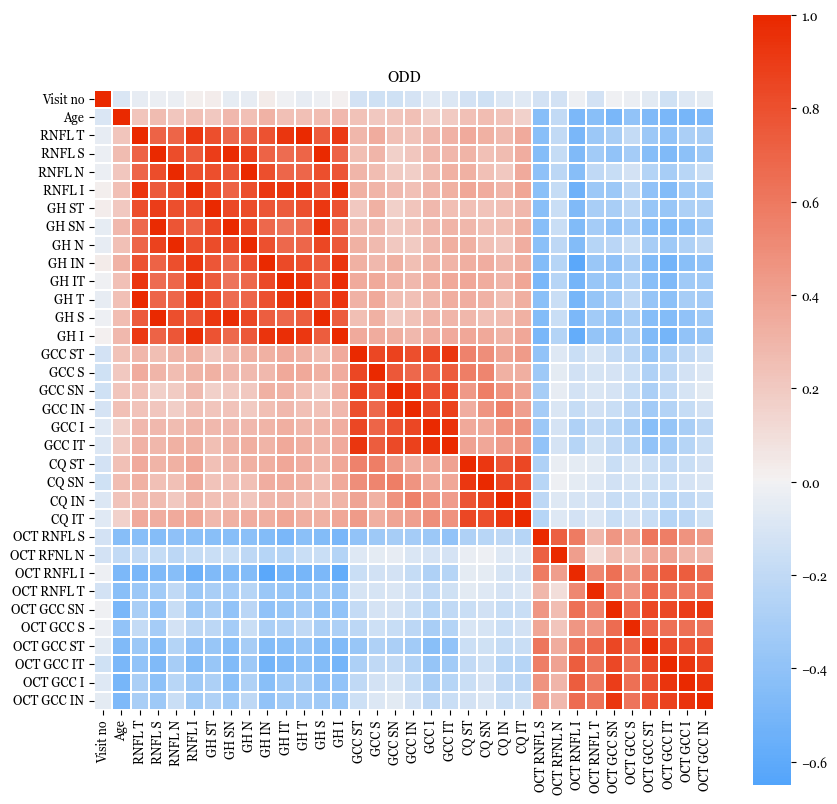

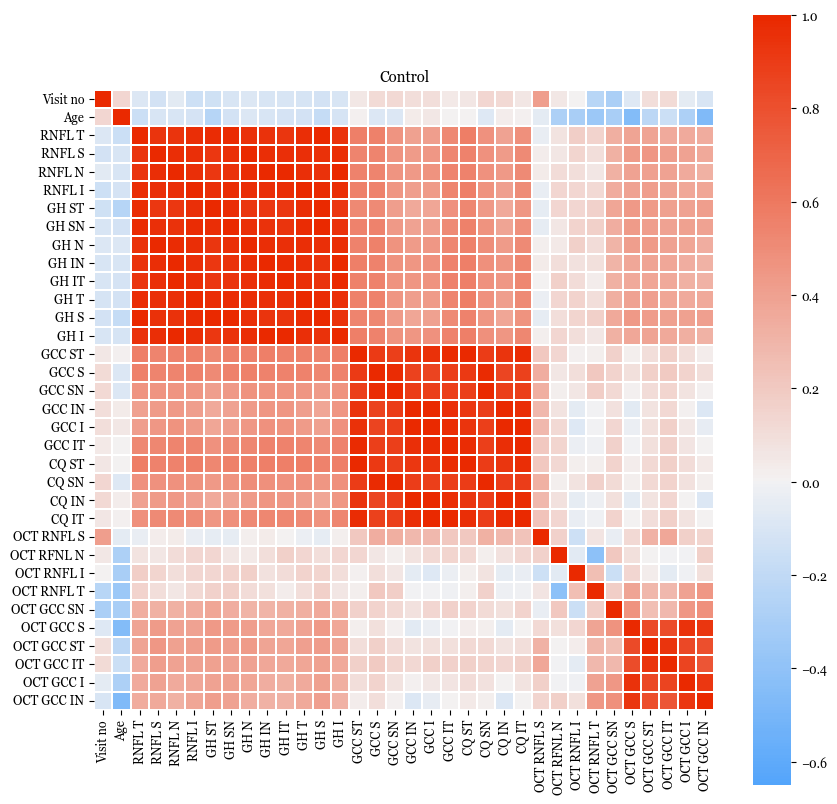

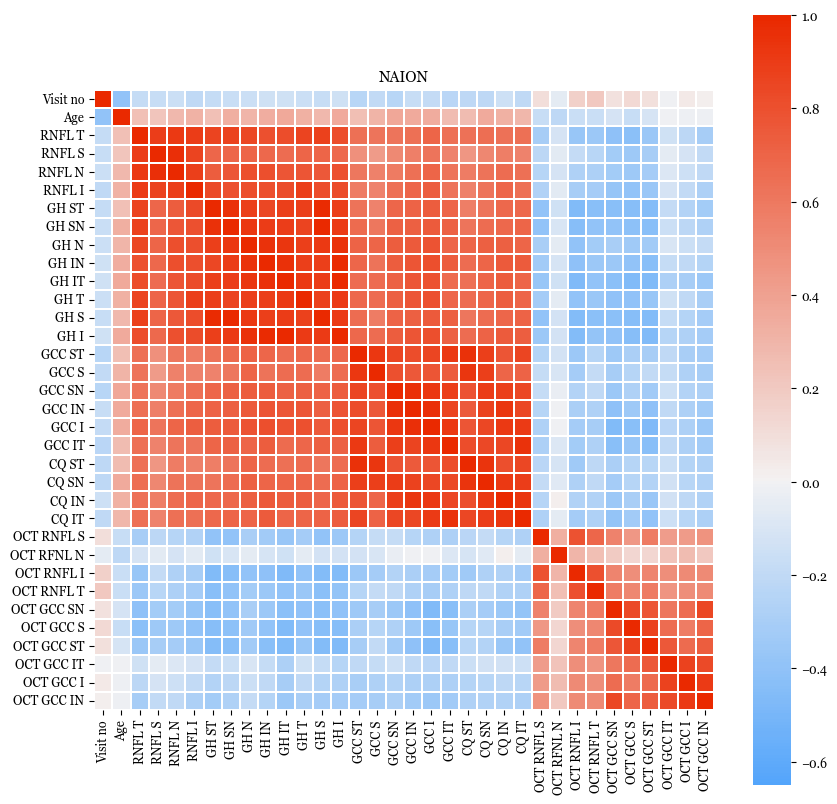

In [ ]:
matplotlib.rcParams["font.sans-serif"]  = "Georgia"
matplotlib.rcParams["font.size"]        = 9

fpfoct = pd.merge(fpf, oct1, on=ivars)
fpfoctcorr = fpfoct.corr(numeric_only=True)

for diagnosis in ['ODD', 'Control', 'NAION']:
    fpfoct_corr = fpfoct[fpfoct['Diagnosis']==diagnosis].corr(numeric_only=True)
    plt.figure(figsize=(10,10))
    g = sns.heatmap(fpfoct_corr, cmap=rb, linewidths=.1, center=0, vmax=1, vmin=-.65, square=True)
    xticklabels = g.get_xticklabels()
    xticklabels = [labels.get_text().replace("_", " ") for labels in xticklabels]
    g.set_xticklabels(xticklabels)
    g.set_yticklabels(xticklabels)
    g.set_title(diagnosis)
    plt.show()


In [ ]:
data.to_csv("../data/ocumet-1102-clean.csv")